## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [62]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/ihavenonamesad/W9_Property_Dataset/refs/heads/main/property_dataset.csv', delimiter=",")

df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [64]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [65]:
df.isna().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

2.

In [6]:
(df.isna().sum()/len(df))*100

Area Category                     0.324675
Nama Daerah                       0.324675
Luas Tanah (m2)                   0.324675
Luas Bangunan (m2)                0.324675
Jumlah Kamar                      0.324675
Jumlah Kamar Mandi                0.649351
Tingkat/Lantai                    0.649351
Harga Penawaran (dari Owner)      0.324675
Terjual/Belum                     0.324675
Arah Hadap Rumah                 26.948052
Posisi Rumah                     37.662338
Lebar Jalan Depan Rumah (ROW)    13.636364
dtype: float64

Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [90]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [91]:
df_imputed.isna().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Drop the column 'Nama Daerah' because all the values are different.

In [92]:
df_imputed = df_imputed.drop('Nama Daerah', axis=1) 
df_imputed.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [93]:
label_encoders = {}
categorical_cols = ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']
for col in categorical_cols:
    le = LabelEncoder()
    df_imputed[col] = le.fit_transform(df_imputed[col])
    label_encoders[col] = le

df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,0,3,2,0
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [94]:
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].replace(r'^\d{1,3}(\.\d{3})*,00$', "10500000000", regex=True)

check the data type

In [95]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int32 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int32 
 8   Arah Hadap Rumah               308 non-null    int32 
 9   Posisi Rumah                   308 non-null    int32 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int32 
dtypes: int32(5), object(6)
memory usage: 20.6+ KB


Change the data types from:

- float to int
- object to int

In [96]:
df_imputed["Area Category"] = df_imputed["Area Category"].astype(int)
df_imputed["Luas Tanah (m2)"] = df_imputed["Luas Tanah (m2)"].astype(int)
df_imputed["Luas Bangunan (m2)"] = df_imputed["Luas Bangunan (m2)"].astype(int)
df_imputed["Jumlah Kamar"] = df_imputed["Jumlah Kamar"].astype(int)
df_imputed["Jumlah Kamar Mandi"] = df_imputed["Jumlah Kamar Mandi"].astype(int)
df_imputed["Tingkat/Lantai "] = df_imputed["Tingkat/Lantai "].astype(int)
df_imputed["Harga Penawaran (dari Owner)"] = df_imputed["Harga Penawaran (dari Owner)"].astype(np.int64)
df_imputed["Terjual/Belum"] = df_imputed["Terjual/Belum"].astype(int)
df_imputed["Arah Hadap Rumah"] = df_imputed["Arah Hadap Rumah"].astype(int)
df_imputed["Posisi Rumah"] = df_imputed["Posisi Rumah"].astype(int)
df_imputed["Lebar Jalan Depan Rumah (ROW)"] = df_imputed["Lebar Jalan Depan Rumah (ROW)"].astype(int)

In [97]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int32
 1   Luas Tanah (m2)                308 non-null    int32
 2   Luas Bangunan (m2)             308 non-null    int32
 3   Jumlah Kamar                   308 non-null    int32
 4   Jumlah Kamar Mandi             308 non-null    int32
 5   Tingkat/Lantai                 308 non-null    int32
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int32
 8   Arah Hadap Rumah               308 non-null    int32
 9   Posisi Rumah                   308 non-null    int32
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int32
dtypes: int32(10), int64(1)
memory usage: 14.6 KB


4.

In [98]:
# scaling data
sc = StandardScaler()
 
scaled = pd.DataFrame(sc.fit_transform(df_imputed), columns=["Area Category", "Luas Tanah (m2)",  "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai", "Harga Penawaran (dari Owner)", 
     "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"])

scaled.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.004372,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.825581
1,-1.677824,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,0.220834
2,1.004372,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.825581
3,0.110307,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.825581
4,-0.783759,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.825581


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

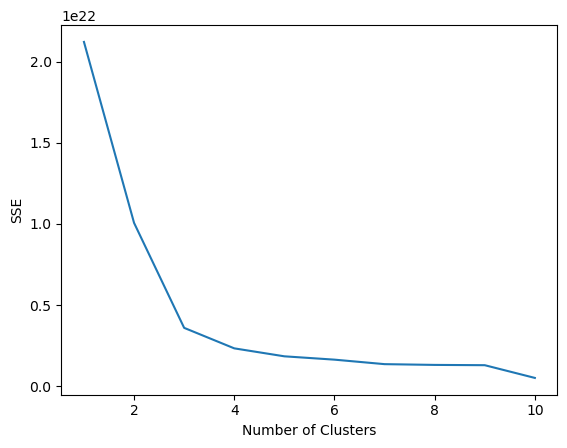

In [99]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_imputed)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [100]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random',max_iter=300,random_state=42)

y_pred = kmeans.fit_predict(df_imputed)

C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [103]:
# Inverse transform the scaled data to get the original values
df_inv = pd.DataFrame(sc.inverse_transform(df_imputed),columns=["Area Category","Luas Tanah (m2)","Luas Bangunan (m2)","Jumlah Kamar","Jumlah Kamar Mandi","Tingkat/Lantai","Harga Penawaran (dari Owner)","Terjual/Belum","Arah Hadap Rumah","Posisi Rumah","Lebar Jalan Depan Rumah (ROW)"])

df_inv['Cluster'] = y_pred

df_inv.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,5.232083,48585.403021,64111.300483,10.840508,8.211375,2.855123,2.904276e+19,0.0,5.180847,2.831030,0.788961,0
1,1.876623,6271.757764,13035.610746,7.558241,4.962233,2.855123,2.388136e+18,0.0,5.180847,2.831030,1.744605,0
2,5.232083,34480.854602,36445.301875,12.481641,9.835946,2.855123,2.240441e+19,0.0,3.162014,2.071429,0.788961,0
3,4.113596,37906.244932,53470.531788,12.481641,11.460517,2.855123,2.572358e+19,0.0,5.180847,2.831030,0.788961,0
4,2.995110,70749.693394,127955.912654,12.481641,11.460517,2.855123,4.148965e+19,0.0,2.152597,2.831030,0.788961,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [88]:
# aggregation
cluster_summary = df_inv.groupby(y_pred).agg(
    {
        'Area Category': ['mean', 'std', 'min', 'max'],
        'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
        'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
        'Tingkat/Lantai': ['mean', 'std', 'min', 'max'],
        'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
        'Terjual/Belum': ['mean', 'std', 'min', 'max'],
        'Arah Hadap Rumah': ['mean', 'std', 'min', 'max'],
        'Posisi Rumah': ['mean', 'std', 'min', 'max'],
        'Lebar Jalan Depan Rumah (ROW)': ['mean', 'std', 'min', 'max']
    }
)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary = cluster_summary.transpose()

cluster_summary

cluster                                        0             1             2
Area Category                 mean  3.981035e+00  3.896113e+00  4.672840e+00
                              std   1.290690e+00  9.572961e-01  7.908894e-01
                              min   1.876623e+00  1.876623e+00  4.113596e+00
                              max   5.232083e+00  5.232083e+00  5.232083e+00
Luas Tanah (m2)               mean  3.490921e+04  1.229533e+05  1.513471e+05
                              std   2.305966e+04  5.188636e+04  4.274324e+04
                              min   3.047861e+03  3.649579e+04  1.211231e+05
                              max   1.714965e+05  3.147584e+05  1.815711e+05
Luas Bangunan (m2)            mean  4.595815e+04  1.331049e+05  1.811598e+05
                              std   3.092338e+04  5.254142e+04  7.524160e+04
                              min   3.246104e+03  5.134238e+04  1.279559e+05
                              max   1.811598e+05  2.556451e+05  2.343636e+05
Jumlah Kamar                  mean  1.093776e+01  1.375808e+01  1.494334e+01
                              std   2.595924e+00  2.004645e+00  1.160457e+00
                              min   5.917107e+00  9.199374e+00  1.412277e+01
                              max   2.561071e+01  1.740504e+01  1.576391e+01
Jumlah Kamar Mandi            mean  8.421968e+00  1.114463e+01  1.146052e+01
                              std   2.483147e+00  2.599878e+00  0.000000e+00
                              min   4.962233e+00  6.586804e+00  1.146052e+01
                              max   2.445709e+01  1.633423e+01  1.146052e+01
Tingkat/Lantai                mean  2.768727e+00  2.826951e+00  2.601570e+00
                              std   2.476656e-01  3.194474e-01  3.585789e-01
                              min   2.348016e+00  2.348016e+00  2.348016e+00
                              max   3.869338e+00  3.362230e+00  2.855123e+00
Harga Penawaran (dari Owner)  mean  2.339862e+19  1.443045e+20  6.513875e+20
                              std   1.709760e+19  5.628604e+19  2.405684e+20
                              min   1.327669e+18  8.712827e+19  4.812800e+20
                              max   7.883034e+19  3.319171e+20  8.214951e+20
Terjual/Belum                 mean  0.000000e+00  0.000000e+00  0.000000e+00
                              std   0.000000e+00  0.000000e+00  0.000000e+00
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   0.000000e+00  0.000000e+00  0.000000e+00
Arah Hadap Rumah              mean  4.324712e+00  4.367706e+00  3.666722e+00
                              std   1.020193e+00  9.895944e-01  2.141296e+00
                              min   2.152597e+00  2.152597e+00  2.152597e+00
                              max   5.180847e+00  5.180847e+00  5.180847e+00
Posisi Rumah                  mean  2.856350e+00  2.862680e+00  3.020930e+00
                              std   1.285154e-01  2.292329e-01  2.685597e-01
                              min   2.071429e+00  2.071429e+00  2.831030e+00
                              max   3.590632e+00  3.590632e+00  3.210831e+00
Lebar Jalan Depan Rumah (ROW) mean  1.507463e+00  1.797696e+00  1.744605e+00
                              std   9.033658e-01  9.677027e-01  1.351484e+00
                              min   7.889610e-01  7.889610e-01  7.889610e-01
                              max   2.700248e+00  2.700248e+00  2.700248e+00

In [105]:
# count data from each cluster
df_inv.Cluster.value_counts()

0    270
1     36
2      2
Name: Cluster, dtype: int64

In [129]:
# write down your interpretation from the cluster that you have been made
print("Cluster 0 consists of large residential or commercial properties with expansive land and building areas, typically featuring a high number of rooms and bathrooms, and multiple floors. These properties are generally on larger plots of land and have higher offer prices.")

Cluster 0 consists of large residential or commercial properties with expansive land and building areas, typically featuring a high number of rooms and bathrooms, and multiple floors. These properties are generally on larger plots of land and have higher offer prices.


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

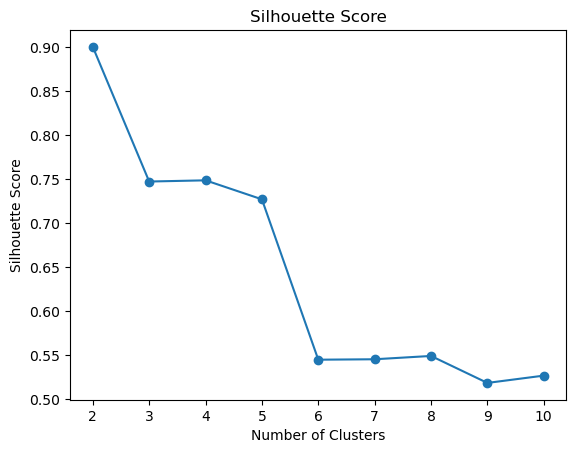

In [106]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_imputed_inverse, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_imputed_inverse, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [49]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_imputed_inverse)

In [107]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_imputed_inversed = pd.DataFrame(sc.inverse_transform(df_imputed),columns=["Area Category","Luas Tanah (m2)","Luas Bangunan (m2)","Jumlah Kamar","Jumlah Kamar Mandi","Tingkat/Lantai","Harga Penawaran (dari Owner)","Terjual/Belum","Arah Hadap Rumah","Posisi Rumah","Lebar Jalan Depan Rumah (ROW)"])

df_imputed_inversed['KMeans'] = y_pred
df_imputed_inversed['Agglo'] = y_hc

# show the df
df_imputed_inversed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,5.232083,48585.403021,64111.300483,10.840508,8.211375,2.855123,2.904276e+19,0.0,5.180847,2.831030,0.788961,0,2
1,1.876623,6271.757764,13035.610746,7.558241,4.962233,2.855123,2.388136e+18,0.0,5.180847,2.831030,1.744605,0,2
2,5.232083,34480.854602,36445.301875,12.481641,9.835946,2.855123,2.240441e+19,0.0,3.162014,2.071429,0.788961,0,2
3,4.113596,37906.244932,53470.531788,12.481641,11.460517,2.855123,2.572358e+19,0.0,5.180847,2.831030,0.788961,0,2
4,2.995110,70749.693394,127955.912654,12.481641,11.460517,2.855123,4.148965e+19,0.0,2.152597,2.831030,0.788961,0,2


Display the cluster summary in the form of a dataframe.

In [108]:
cluster_summary = df_imputed_inversed.groupby(y_hc).agg(
    {
        'Area Category': ['mean', 'std', 'min', 'max'],
        'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
        'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
        'Tingkat/Lantai': ['mean', 'std', 'min', 'max'],
    }
)

cluster_summary = cluster_summary.rename_axis('Agglo')

cluster_summary

Area Category                               Luas Tanah (m2)  \
               mean       std       min       max            mean   
Agglo                                                               
0          4.393218  0.559243  4.113596  5.232083   168725.931519   
1          3.916216  0.993022  1.876623  5.232083   105821.423454   
2          3.980969  1.307642  1.876623  5.232083    31947.451524   

                                                  Luas Bangunan (m2)  \
                std            min            max               mean   
Agglo                                                                  
0      34267.481672  121123.080605  201720.500142      207761.677868   
1      49280.748471   17152.409402  314758.381044      117198.304146   
2      18900.116266    3047.860983   99966.257976       42508.437113   

                                                  Jumlah Kamar            \
                std            min            max         mean       std   
Agglo                                                                      
0      55969.499281  127955.912654  255645.136996    14.533058  1.571266   
1      45838.422172   15163.764485  234363.599606    13.543551  2.245980   
2      27346.717139    3246.103546  159878.218740    10.788614  2.527565   

                            Tingkat/Lantai                                
             min        max           mean       std       min       max  
Agglo                                                                     
0      12.481641  15.763908       2.855123  0.414051  2.348016  3.362230  
1       7.558241  17.405041       2.795464  0.280464  2.348016  3.362230  
2       5.917107  25.610708       2.768935  0.250907  2.348016  3.869338

In [109]:
cluster_summary = df_imputed_inversed.groupby(y_hc).agg(
    {
        'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
        'Terjual/Belum': ['mean', 'std', 'min', 'max'],
        'Arah Hadap Rumah': ['mean', 'std', 'min', 'max'],
        'Posisi Rumah': ['mean', 'std', 'min', 'max'],
        'Lebar Jalan Depan Rumah (ROW)': ['mean', 'std', 'min', 'max']
    }
)

cluster_summary = cluster_summary.rename_axis('Agglo')

cluster_summary

Harga Penawaran (dari Owner)                                            \
                              mean           std           min           max   
Agglo                                                                          
0                     4.812799e+20  2.411640e+20  2.904276e+20  8.214951e+20   
1                     1.124542e+20  4.499939e+19  5.808551e+19  2.364910e+20   
2                     2.037581e+19  1.279467e+19  1.327669e+18  5.393655e+19   

      Terjual/Belum                Arah Hadap Rumah                      \
               mean  std  min  max             mean       std       min   
Agglo                                                                     
0               0.0  0.0  0.0  0.0         4.171431  1.427531  2.152597   
1               0.0  0.0  0.0  0.0         4.448525  0.990637  2.152597   
2               0.0  0.0  0.0  0.0         4.303094  1.022739  2.152597   

                Posisi Rumah                                \
            max         mean       std       min       max   
Agglo                                                        
0      5.180847     2.925980  0.189900  2.831030  3.210831   
1      5.180847     2.875713  0.210055  2.071429  3.590632   
2      5.180847     2.853548  0.126850  2.071429  3.590632   

      Lebar Jalan Depan Rumah (ROW)                                
                               mean       std       min       max  
Agglo                                                              
0                          1.744605  1.103482  0.788961  2.700248  
1                          1.763343  0.964967  0.788961  2.700248  
2                          1.495306  0.898538  0.788961  2.700248

In [110]:
df_imputed_inversed.Agglo.value_counts()

2    253
1     51
0      4
Name: Agglo, dtype: int64

In [130]:
# write down your interpretation from the cluster that you have been made
print("Cluster 0 represents large residential or commercial properties with expansive land and building areas, multiple rooms, and higher prices, showing consistency across both KMeans and Agglomerative clustering.")

Cluster 0 represents large residential or commercial properties with expansive land and building areas, multiple rooms, and higher prices, showing consistency across both KMeans and Agglomerative clustering.


**Hierarchical Visualization**

Single Linkage

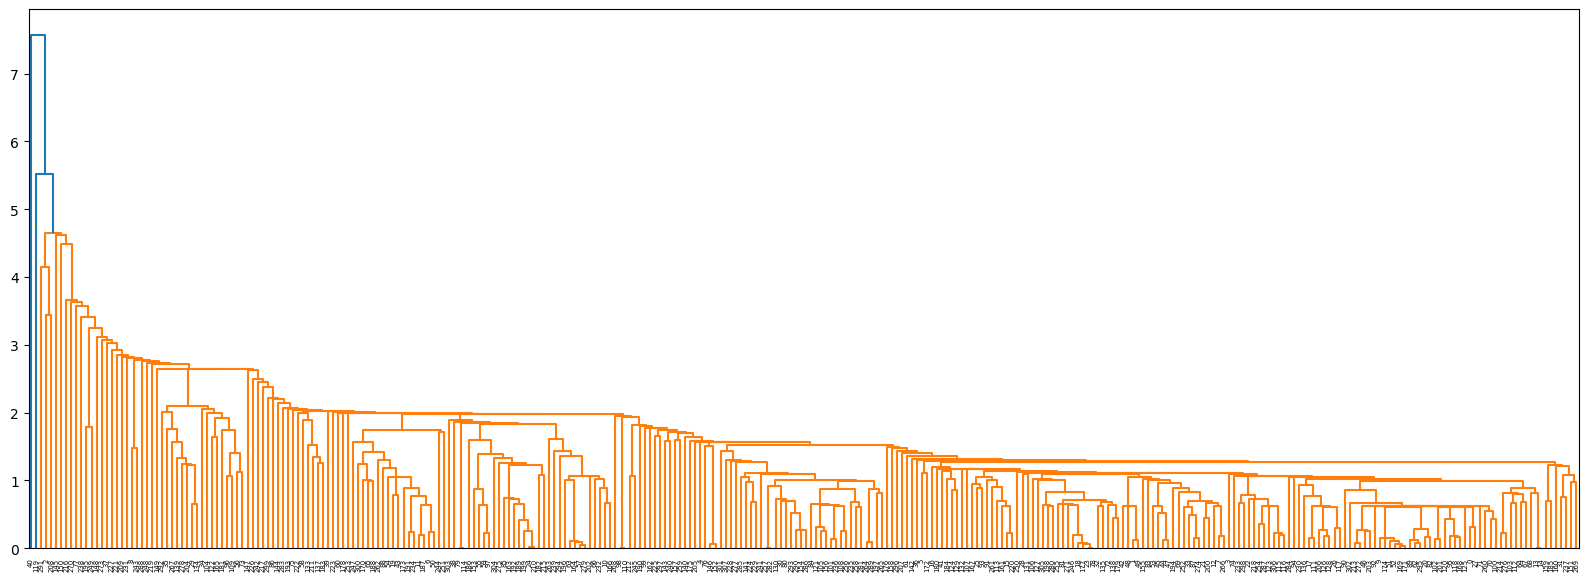

In [124]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='single')
dendrogram(linkage_data)
plt.show()

complete linkage

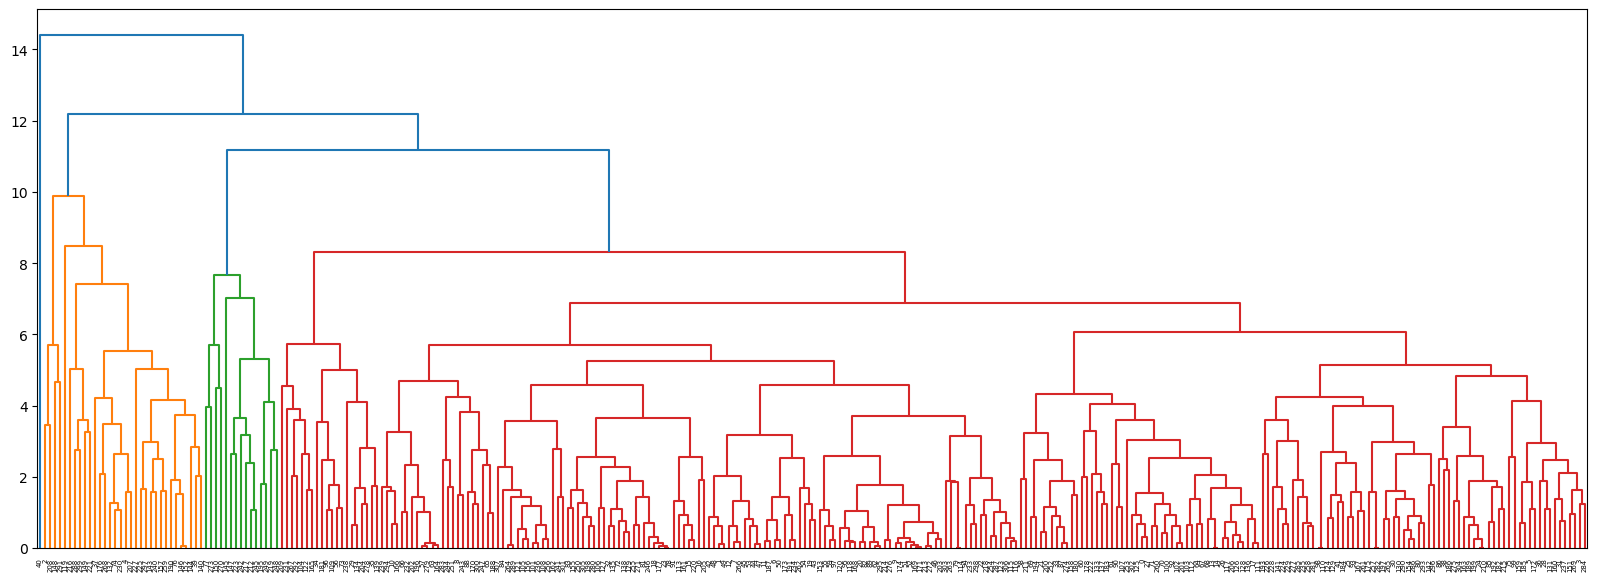

In [127]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='complete')
dendrogram(linkage_data)
plt.show()

average linkage

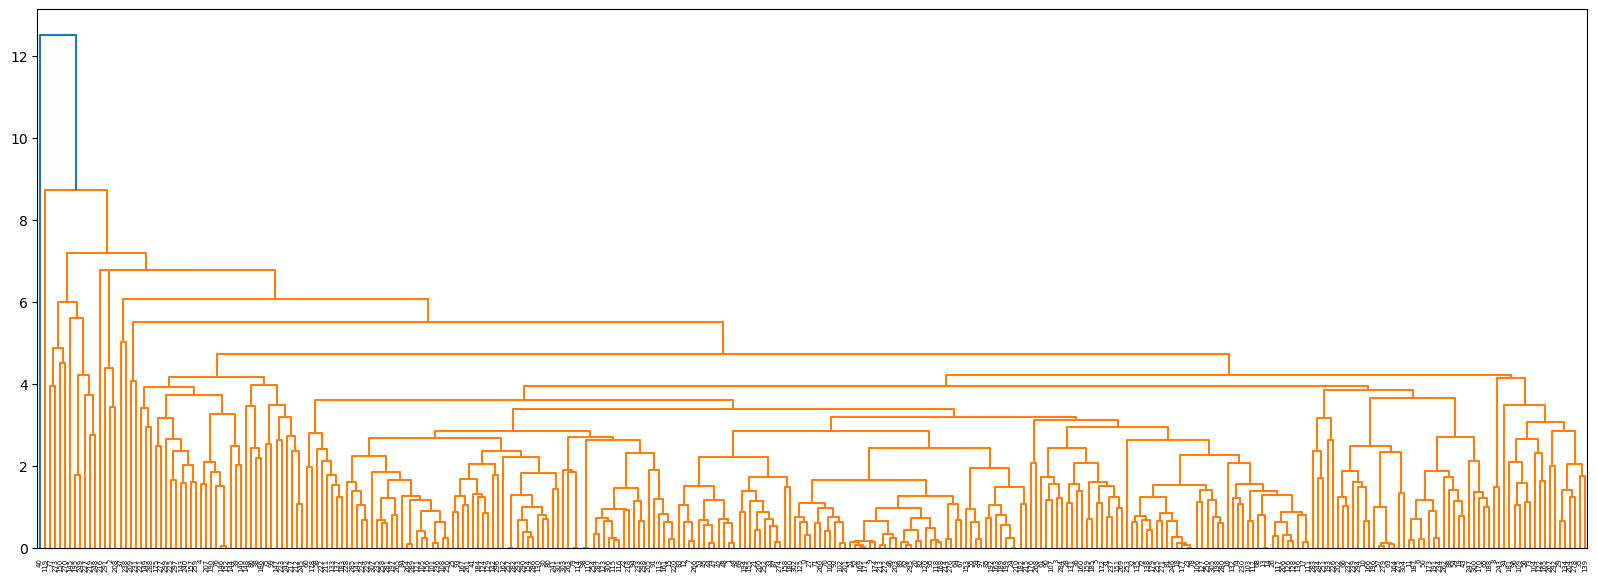

In [128]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='average')
dendrogram(linkage_data)
plt.show()

ward method

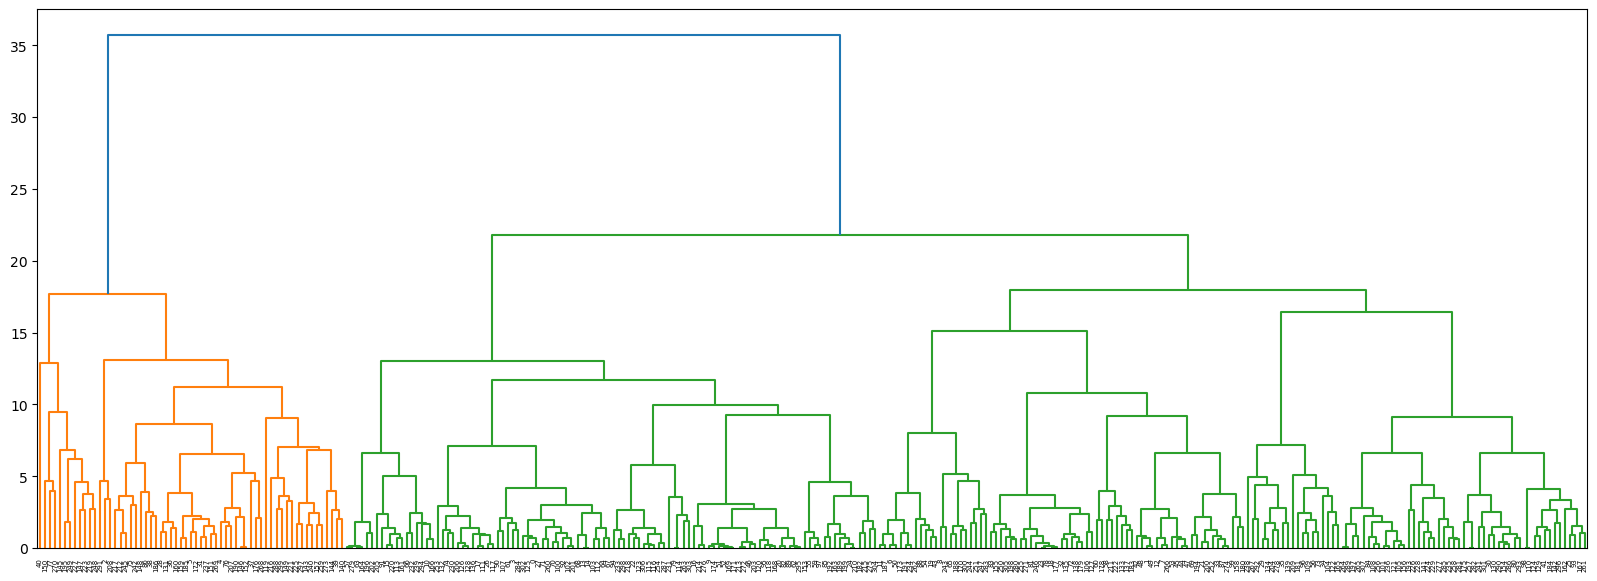

In [123]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='ward')
dendrogram(linkage_data)
plt.show()